In [1]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import joblib



In [2]:
# Load dataset
df = pd.read_csv(r"D:\important\datascience\BigMart Sales Data.csv")




In [3]:
# Data exploration
print(df.head())  # Show first few rows


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [4]:
print(df.describe())  # Summary statistics


       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


<Axes: >

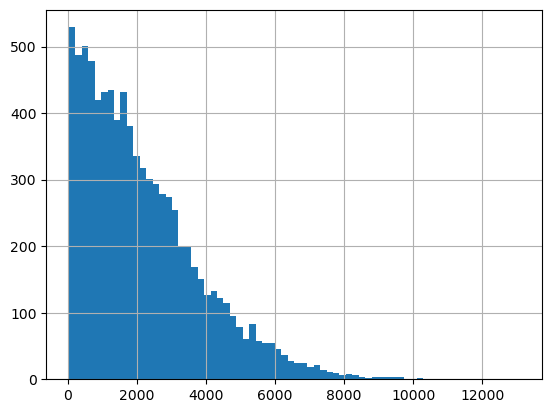

In [5]:
df['Item_Outlet_Sales'].hist(bins=70)  # Sales distribution


In [6]:
print(df.dtypes)  # Check data types


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [7]:
# Handling missing values
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


In [8]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)


In [9]:

# Feature selection
X = df[['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_Type']]
y = df['Item_Outlet_Sales']


In [10]:
# One-hot encoding of categorical variables
X = pd.get_dummies(X, drop_first=True)



In [11]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
# Check for missing values
print(X_train.isnull().sum())  # Check for missing values in the features
print(y_train.isnull().sum())  # Check for missing values in the target variable



Item_Weight                      0
Item_Visibility                  0
Item_MRP                         0
Outlet_Establishment_Year        0
Outlet_Size_Medium               0
Outlet_Size_Small                0
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
dtype: int64
0


In [33]:
# Train the model
model.fit(X_train, y_train)



LinearRegression()

In [19]:
# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [20]:
# Make predictions
y_pred = model.predict(X_test)


In [22]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


In [23]:
# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 791.0200609330645
Mean Squared Error (MSE): 1138871.4729120277
Root Mean Squared Error (RMSE): 1067.1792131184095
R-squared (R²): 0.5809845417725026


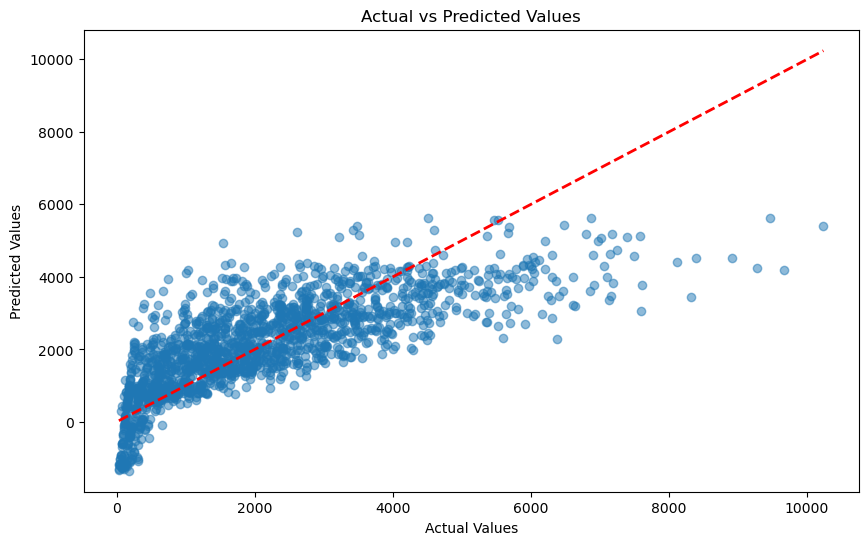

In [24]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [25]:
# Get feature names and coefficients
feature_names = X.columns
coefficients = model.coef_


In [26]:
# Create a DataFrame for visualization
importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance = importance.sort_values(by='Coefficient', ascending=False)


In [28]:
# Print feature importance
print(importance)



                          Feature  Coefficient
10  Outlet_Type_Supermarket Type3  3788.391581
8   Outlet_Type_Supermarket Type1  1527.641155
9   Outlet_Type_Supermarket Type2  1280.365775
3       Outlet_Establishment_Year    32.676386
2                        Item_MRP    15.649085
0                     Item_Weight    -1.959354
6     Outlet_Location_Type_Tier 2  -177.491342
7     Outlet_Location_Type_Tier 3  -401.335638
1                 Item_Visibility  -447.099282
5               Outlet_Size_Small  -766.867500
4              Outlet_Size_Medium  -822.731201


In [50]:
y = df['Item_Outlet_Sales']

In [29]:
# Save the model to a file
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']